# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=81e184ad56e7e62e66a3e02d0a8dc0d4&q=pevek&units=imperial'

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

   

   

    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
#         print(response)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       
      
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = datetime.utcfromtimestamp(response['dt']).strftime('%Y-%m-%d %H:%M:%S')


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except KeyError as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | umm lajj
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | portland
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | vostok
Processing Record 13 of Set 1 | mananara
Processing Record 14 of Set 1 | tazovskiy
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | manta
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | nome
Processing Record 22 of Set 1 | ibotirama
Processing Record 23 of Set 1 | calvinia
Processing 

Processing Record 35 of Set 4 | verkh-chebula
Processing Record 36 of Set 4 | carlsbad
Processing Record 37 of Set 4 | farafangana
Processing Record 38 of Set 4 | hihifo
'coord'
City not found. Skipping...
Processing Record 39 of Set 4 | hailar
Processing Record 40 of Set 4 | ardistan
'coord'
City not found. Skipping...
Processing Record 41 of Set 4 | richmond
Processing Record 42 of Set 4 | stodolishche
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | quelimane
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | grand river south east
'coord'
City not found. Skipping...
Processing Record 48 of Set 4 | tucumcari
Processing Record 49 of Set 4 | cape town
Processing Record 0 of Set 5 | vanino
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | meulaboh
Processing Record 4 of Set 5 | bantry
Processing Record 5 of Set 

Processing Record 20 of Set 8 | mahibadhoo
Processing Record 21 of Set 8 | lithakia
Processing Record 22 of Set 8 | pangai
Processing Record 23 of Set 8 | san cristobal
Processing Record 24 of Set 8 | owando
Processing Record 25 of Set 8 | craig
Processing Record 26 of Set 8 | valparaiso
Processing Record 27 of Set 8 | buchanan
Processing Record 28 of Set 8 | vrangel
Processing Record 29 of Set 8 | kerouane
Processing Record 30 of Set 8 | yairipok
Processing Record 31 of Set 8 | myitkyina
Processing Record 32 of Set 8 | ginir
Processing Record 33 of Set 8 | bolungarvik
'coord'
City not found. Skipping...
Processing Record 34 of Set 8 | iqaluit
Processing Record 35 of Set 8 | bonthe
Processing Record 36 of Set 8 | paita
Processing Record 37 of Set 8 | awbari
Processing Record 38 of Set 8 | havelock
Processing Record 39 of Set 8 | dunmore east
Processing Record 40 of Set 8 | wanaka
Processing Record 41 of Set 8 | visnes
Processing Record 42 of Set 8 | lar
Processing Record 43 of Set 8 | 

Processing Record 8 of Set 12 | rabak
Processing Record 9 of Set 12 | bandarbeyla
Processing Record 10 of Set 12 | hami
Processing Record 11 of Set 12 | buqayq
'coord'
City not found. Skipping...
Processing Record 12 of Set 12 | aksha
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | vagur
Processing Record 15 of Set 12 | ratnagiri
Processing Record 16 of Set 12 | warqla
'coord'
City not found. Skipping...
Processing Record 17 of Set 12 | eldoret
Processing Record 18 of Set 12 | matara
Processing Record 19 of Set 12 | lompoc
Processing Record 20 of Set 12 | gengenbach
Processing Record 21 of Set 12 | villa bruzual
Processing Record 22 of Set 12 | narsaq
Processing Record 23 of Set 12 | vardo
Processing Record 24 of Set 12 | baillif
Processing Record 25 of Set 12 | beaufort
Processing Record 26 of Set 12 | taksimo
Processing Record 27 of Set 12 | bapatla
Processing Record 28 of Set 12 | kyrnasivka
Processing Record 29 of Set 12 | andros town
Processing Record 30 of 

In [8]:
city_data

[{'City': 'dikson',
  'Lat': 73.5069,
  'Lng': 80.5464,
  'Max Temp': 1.76,
  'Humidity': 83,
  'Cloudiness': 100,
  'Wind Speed': 18.77,
  'Country': 'RU',
  'Date': '2023-02-08 12:38:23'},
 {'City': 'kapaa',
  'Lat': 22.0752,
  'Lng': -159.319,
  'Max Temp': 73.72,
  'Humidity': 84,
  'Cloudiness': 0,
  'Wind Speed': 14.97,
  'Country': 'US',
  'Date': '2023-02-08 12:38:24'},
 {'City': 'umm lajj',
  'Lat': 25.0213,
  'Lng': 37.2685,
  'Max Temp': 69.04,
  'Humidity': 42,
  'Cloudiness': 100,
  'Wind Speed': 19.42,
  'Country': 'SA',
  'Date': '2023-02-08 12:38:24'},
 {'City': 'mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 48.47,
  'Humidity': 90,
  'Cloudiness': 79,
  'Wind Speed': 7.25,
  'Country': 'NZ',
  'Date': '2023-02-08 12:38:25'},
 {'City': 'coihaique',
  'Lat': -45.5752,
  'Lng': -72.0662,
  'Max Temp': 63.21,
  'Humidity': 72,
  'Cloudiness': 75,
  'Wind Speed': 8.05,
  'Country': 'CL',
  'Date': '2023-02-08 12:35:30'},
 {'City': 'arraial do cabo',
  'Lat':

In [9]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [10]:
# Display sample data
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,1.76,83,100,18.77,RU,2023-02-08 12:38:23
1,kapaa,22.0752,-159.3190,73.72,84,0,14.97,US,2023-02-08 12:38:24
2,umm lajj,25.0213,37.2685,69.04,42,100,19.42,SA,2023-02-08 12:38:24
3,mataura,-46.1927,168.8643,48.47,90,79,7.25,NZ,2023-02-08 12:38:25
4,coihaique,-45.5752,-72.0662,63.21,72,75,8.05,CL,2023-02-08 12:35:30
5,arraial do cabo,-22.9661,-42.0278,76.96,83,75,2.30,BR,2023-02-08 12:38:26
6,hermanus,-34.4187,19.2345,82.80,50,0,23.11,ZA,2023-02-08 12:38:27
7,portland,45.5234,-122.6762,42.04,91,20,8.05,US,2023-02-08 12:35:00
8,pangnirtung,66.1451,-65.7125,-22.00,63,0,2.30,CA,2023-02-08 12:38:28
9,cherskiy,68.7500,161.3000,-23.49,98,100,6.38,RU,2023-02-08 12:38:28


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,1.76,83,100,18.77,RU,2023-02-08 12:38:23
1,kapaa,22.0752,-159.3190,73.72,84,0,14.97,US,2023-02-08 12:38:24
2,umm lajj,25.0213,37.2685,69.04,42,100,19.42,SA,2023-02-08 12:38:24
3,mataura,-46.1927,168.8643,48.47,90,79,7.25,NZ,2023-02-08 12:38:25
4,coihaique,-45.5752,-72.0662,63.21,72,75,8.05,CL,2023-02-08 12:35:30


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

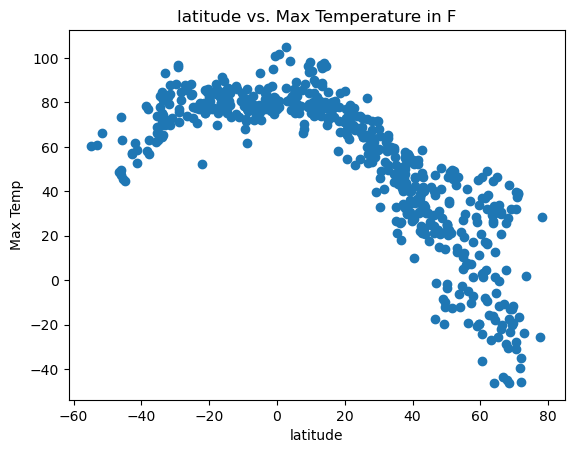

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.xlabel("latitude")
plt.ylabel("Max Temp")
plt.title("latitude vs. Max Temperature in F")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

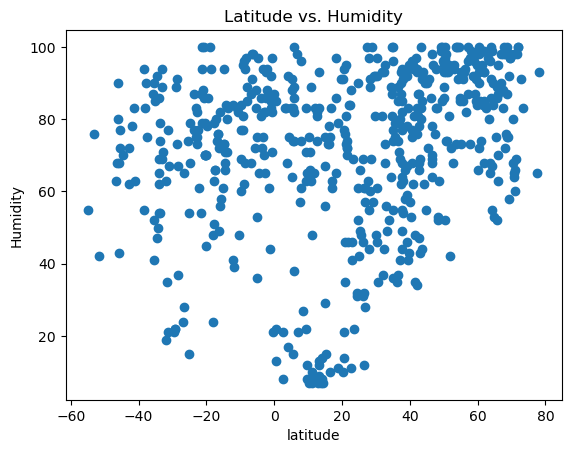

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.xlabel("latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

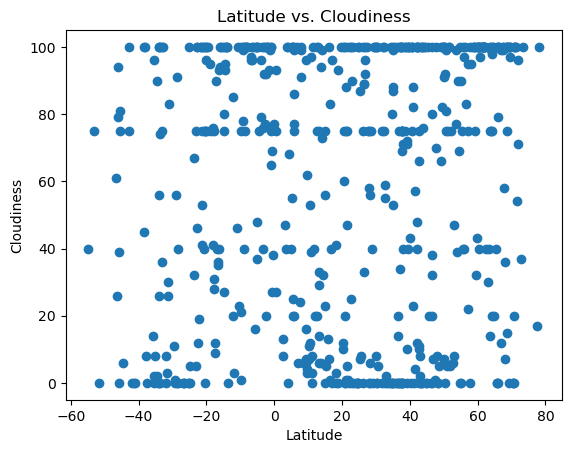

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

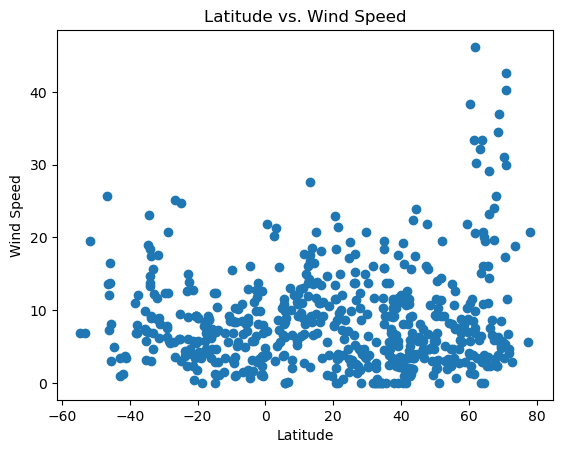

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,1.76,83,100,18.77,RU,2023-02-08 12:38:23
1,kapaa,22.0752,-159.3190,73.72,84,0,14.97,US,2023-02-08 12:38:24
2,umm lajj,25.0213,37.2685,69.04,42,100,19.42,SA,2023-02-08 12:38:24
7,portland,45.5234,-122.6762,42.04,91,20,8.05,US,2023-02-08 12:35:00
8,pangnirtung,66.1451,-65.7125,-22.00,63,0,2.30,CA,2023-02-08 12:38:28


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mataura,-46.1927,168.8643,48.47,90,79,7.25,NZ,2023-02-08 12:38:25
4,coihaique,-45.5752,-72.0662,63.21,72,75,8.05,CL,2023-02-08 12:35:30
5,arraial do cabo,-22.9661,-42.0278,76.96,83,75,2.30,BR,2023-02-08 12:38:26
6,hermanus,-34.4187,19.2345,82.80,50,0,23.11,ZA,2023-02-08 12:38:27
10,avarua,-21.2078,-159.7750,75.25,94,53,2.30,CK,2023-02-08 12:38:29


###  Temperature vs. Latitude Linear Regression Plot

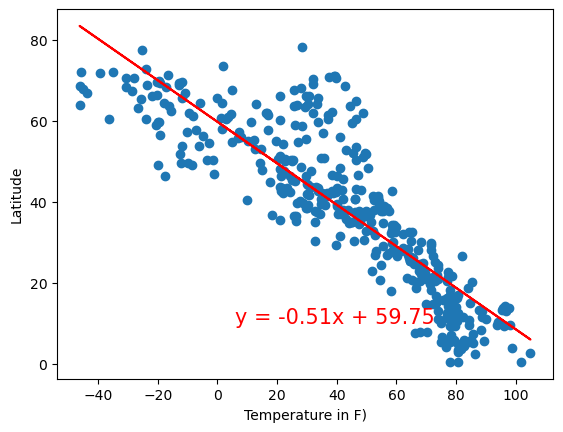

In [23]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Max Temp"]
y_value = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature in F)')
plt.ylabel('Latitude')
plt.show()

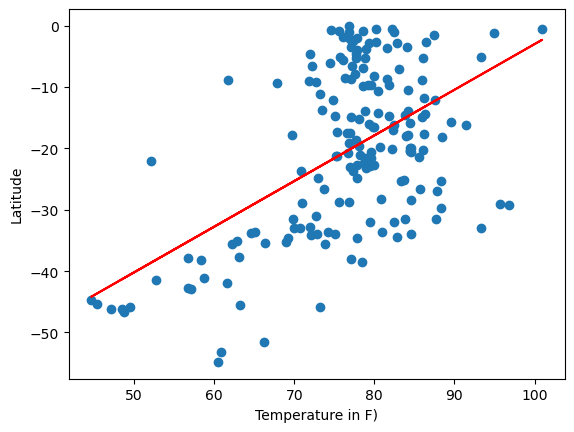

In [24]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Max Temp"]
y_value = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature in F)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** The max temperature decreases the further away from the equator respresented by latitude of 0, with the range of temperatures being more wide spread in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

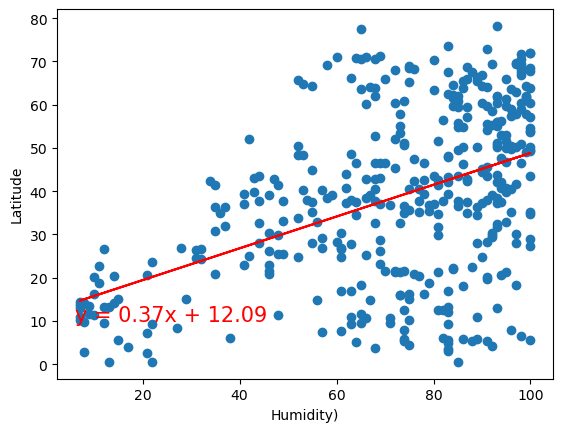

In [25]:
# Northern Hemisphere
x_value = northern_hemi_df["Humidity"]
y_value = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity)')
plt.ylabel('Latitude')
plt.show()

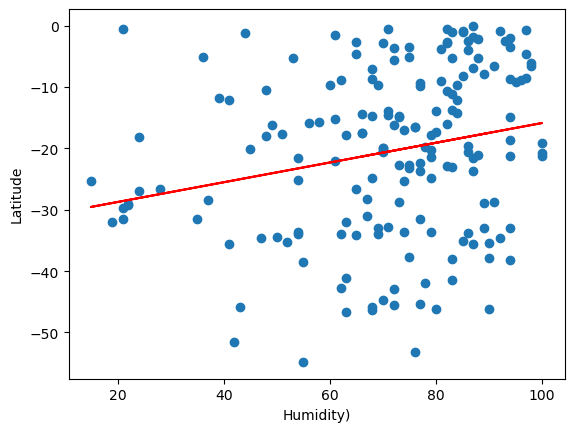

In [26]:
# Southern Hemisphere
x_value = southern_hemi_df["Humidity"]
y_value = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity)')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** The humidity is impacted by latititude more in the southern hemisphere then in the northern, and there is a lower correllations then was seen with the max temp.

### Cloudiness vs. Latitude Linear Regression Plot

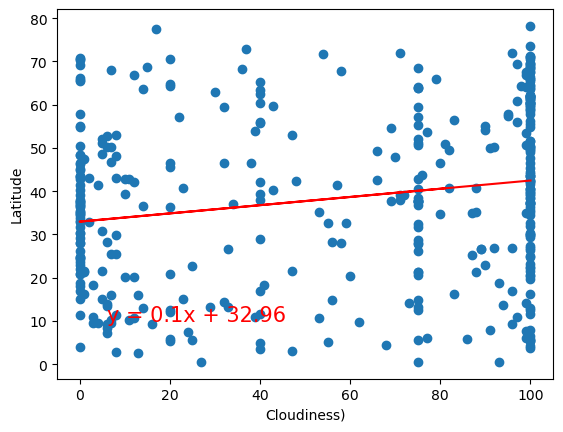

In [27]:
# Northern Hemisphere
x_value = northern_hemi_df["Cloudiness"]
y_value = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness)')
plt.ylabel('Latitude')
plt.show()

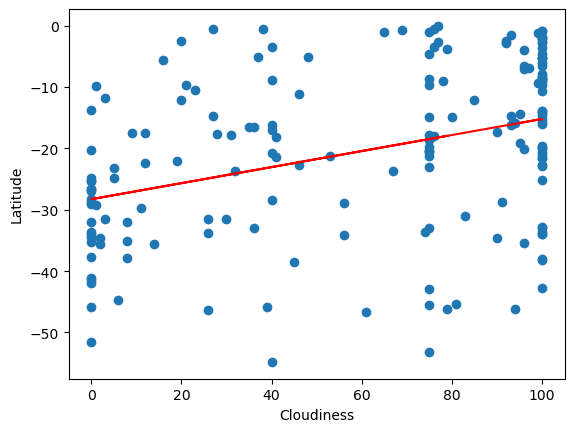

In [31]:
# Southern Hemisphere
x_value = southern_hemi_df["Cloudiness"]
y_value = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** The cloudiness has only as slight correlation with latitude but does appear create a more distinct pattern of strands.  There is a difference in the correlation in the two hemispheres, 

### Wind Speed vs. Latitude Linear Regression Plot

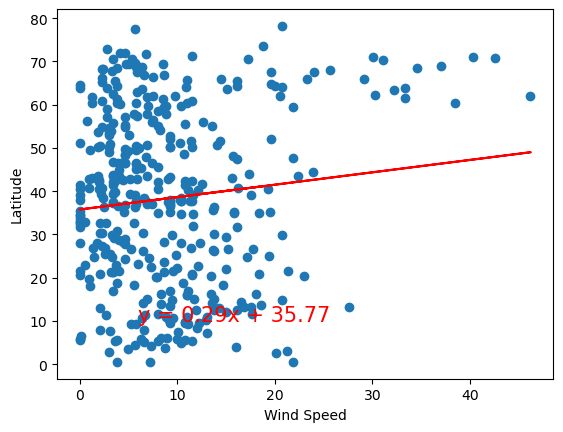

In [29]:
# Northern Hemisphere
x_value = northern_hemi_df["Wind Speed"]
y_value = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

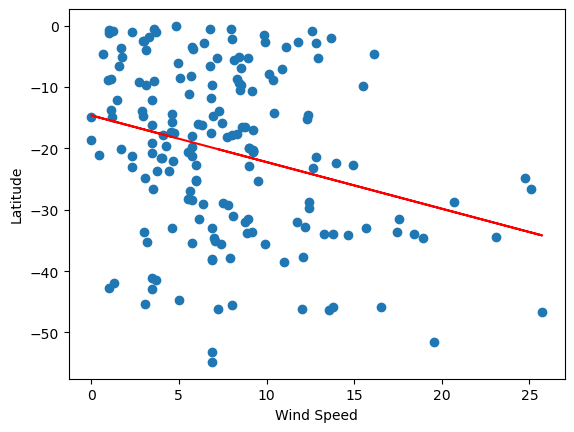

In [30]:
# Southern Hemisphere
x_value = southern_hemi_df["Wind Speed"]
y_value = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

**Discussion about the linear relationship:** The wind speed has a clear correlation with latitude in both hemispheres, with the wind speed increasing with distence from the equator.